<a id="top"></a>
# Creating cf-compliant netCDF files in python using a radar-based precipitation data set as example

***

## Learning Objectives

At the end of this tutorial, learners will be able to:
- read binary data in python
- explain the netCDF data format and the "Climate and Forecast (CF)" meta data standard
- write netCDF data in python

As an example we will use precipitation data from a gauge-adjusted radardataset of Deutscher Wetterdienst (DWD).

## Introduction

The "radar climatology" of Deutscher Wetterdienst (DWD) contains precipitation measurements based on radardata which have been quality-controlled and adjusted. It offers continuous observations of precipitation in space and time with a spatial resolution of 1 km * 1km and a temporal resolution of 1 h (the so-called RW-product) or 5 min (YW-product). The access to the dataset and further information are available here:
DOI:_10.5676/DWD/RADKLIM_RW_V2017.002_

The data is available in a binary format which will be converted to the netCDF format in this tutorial. 

## Libraries
The following python libraries are required:
- numpy
- xarray
- pandas
- matplotlib
- datetime

In [1]:
import datetime as dt
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import math

## 1. Download the data

We start by downloading the data from the opendata-Server of Deutscher Wetterdienst.  

In [3]:
!mkdir ./data
!wget https://opendata.dwd.de/climate_environment/CDC/grids_germany/hourly/radolan/reproc/2017_002/bin/2001/RW2017.002_200101.tar.gz

mkdir: das Verzeichnis „./data“ kann nicht angelegt werden: Die Datei existiert bereits
--2023-07-18 17:16:01--  https://opendata.dwd.de/climate_environment/CDC/grids_germany/hourly/radolan/reproc/2017_002/bin/2001/RW2017.002_200101.tar.gz
Auflösen des Hostnamens opendata.dwd.de (opendata.dwd.de)… 141.38.2.22, 141.38.2.26
Verbindungsaufbau zu opendata.dwd.de (opendata.dwd.de)|141.38.2.22|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 26337160 (25M) [application/octet-stream]
Wird in »RW2017.002_200101.tar.gz.11« gespeichert.

RW2017.002_200101.t 100%[===================>]  25,12M  23,4MB/s    in 1,1s    

2023-07-18 17:16:02 (23,4 MB/s) - »RW2017.002_200101.tar.gz.11« gespeichert [26337160/26337160]



## 2. Untar the data

The data is stored as monthly tar-archives. By untaring the data, files will be created which adhere to the following naming convention:
`raa01-rw2017.002_10000-************-dwd---bin`
where `*` serves as wildcard to denote the time and date of the data in the format `YYMMDDHHMM`. 

In [4]:
!tar -xvf RW2017.002_200101.tar.gz -C data
!ls -l data/

raa01-rw2017.002_10000-0101312250-dwd---bin
raa01-rw2017.002_10000-0101312350-dwd---bin
raa01-rw2017.002_10000-0101312150-dwd---bin
raa01-rw2017.002_10000-0101312050-dwd---bin
raa01-rw2017.002_10000-0101311950-dwd---bin
raa01-rw2017.002_10000-0101311850-dwd---bin
raa01-rw2017.002_10000-0101311750-dwd---bin
raa01-rw2017.002_10000-0101311650-dwd---bin
raa01-rw2017.002_10000-0101311550-dwd---bin
raa01-rw2017.002_10000-0101311450-dwd---bin
raa01-rw2017.002_10000-0101311350-dwd---bin
raa01-rw2017.002_10000-0101311250-dwd---bin
raa01-rw2017.002_10000-0101311150-dwd---bin
raa01-rw2017.002_10000-0101311050-dwd---bin
raa01-rw2017.002_10000-0101310950-dwd---bin
raa01-rw2017.002_10000-0101310750-dwd---bin
raa01-rw2017.002_10000-0101310850-dwd---bin
raa01-rw2017.002_10000-0101310450-dwd---bin
raa01-rw2017.002_10000-0101310650-dwd---bin
raa01-rw2017.002_10000-0101310550-dwd---bin
raa01-rw2017.002_10000-0101310350-dwd---bin
raa01-rw2017.002_10000-0101310250-dwd---bin
raa01-rw2017.002_10000-010131015

raa01-rw2017.002_10000-0101240450-dwd---bin
raa01-rw2017.002_10000-0101240250-dwd---bin
raa01-rw2017.002_10000-0101240350-dwd---bin
raa01-rw2017.002_10000-0101240150-dwd---bin
raa01-rw2017.002_10000-0101240050-dwd---bin
raa01-rw2017.002_10000-0101232350-dwd---bin
raa01-rw2017.002_10000-0101232250-dwd---bin
raa01-rw2017.002_10000-0101231950-dwd---bin
raa01-rw2017.002_10000-0101231850-dwd---bin
raa01-rw2017.002_10000-0101232150-dwd---bin
raa01-rw2017.002_10000-0101232050-dwd---bin
raa01-rw2017.002_10000-0101231750-dwd---bin
raa01-rw2017.002_10000-0101231650-dwd---bin
raa01-rw2017.002_10000-0101231550-dwd---bin
raa01-rw2017.002_10000-0101231450-dwd---bin
raa01-rw2017.002_10000-0101231350-dwd---bin
raa01-rw2017.002_10000-0101231150-dwd---bin
raa01-rw2017.002_10000-0101231250-dwd---bin
raa01-rw2017.002_10000-0101231050-dwd---bin
raa01-rw2017.002_10000-0101230950-dwd---bin
raa01-rw2017.002_10000-0101230850-dwd---bin
raa01-rw2017.002_10000-0101230750-dwd---bin
raa01-rw2017.002_10000-010123065

raa01-rw2017.002_10000-0101160850-dwd---bin
raa01-rw2017.002_10000-0101161050-dwd---bin
raa01-rw2017.002_10000-0101160750-dwd---bin
raa01-rw2017.002_10000-0101160650-dwd---bin
raa01-rw2017.002_10000-0101160550-dwd---bin
raa01-rw2017.002_10000-0101160450-dwd---bin
raa01-rw2017.002_10000-0101160350-dwd---bin
raa01-rw2017.002_10000-0101160250-dwd---bin
raa01-rw2017.002_10000-0101160150-dwd---bin
raa01-rw2017.002_10000-0101160050-dwd---bin
raa01-rw2017.002_10000-0101152350-dwd---bin
raa01-rw2017.002_10000-0101152150-dwd---bin
raa01-rw2017.002_10000-0101152250-dwd---bin
raa01-rw2017.002_10000-0101152050-dwd---bin
raa01-rw2017.002_10000-0101151950-dwd---bin
raa01-rw2017.002_10000-0101151850-dwd---bin
raa01-rw2017.002_10000-0101151750-dwd---bin
raa01-rw2017.002_10000-0101151650-dwd---bin
raa01-rw2017.002_10000-0101151350-dwd---bin
raa01-rw2017.002_10000-0101151550-dwd---bin
raa01-rw2017.002_10000-0101151450-dwd---bin
raa01-rw2017.002_10000-0101151250-dwd---bin
raa01-rw2017.002_10000-010115105

raa01-rw2017.002_10000-0101081950-dwd---bin
raa01-rw2017.002_10000-0101081850-dwd---bin
raa01-rw2017.002_10000-0101081750-dwd---bin
raa01-rw2017.002_10000-0101081650-dwd---bin
raa01-rw2017.002_10000-0101081550-dwd---bin
raa01-rw2017.002_10000-0101081450-dwd---bin
raa01-rw2017.002_10000-0101081350-dwd---bin
raa01-rw2017.002_10000-0101081250-dwd---bin
raa01-rw2017.002_10000-0101081150-dwd---bin
raa01-rw2017.002_10000-0101081050-dwd---bin
raa01-rw2017.002_10000-0101080850-dwd---bin
raa01-rw2017.002_10000-0101080950-dwd---bin
raa01-rw2017.002_10000-0101080750-dwd---bin
raa01-rw2017.002_10000-0101080650-dwd---bin
raa01-rw2017.002_10000-0101080550-dwd---bin
raa01-rw2017.002_10000-0101080450-dwd---bin
raa01-rw2017.002_10000-0101080350-dwd---bin
raa01-rw2017.002_10000-0101080250-dwd---bin
raa01-rw2017.002_10000-0101080150-dwd---bin
raa01-rw2017.002_10000-0101080050-dwd---bin
raa01-rw2017.002_10000-0101072350-dwd---bin
raa01-rw2017.002_10000-0101072250-dwd---bin
raa01-rw2017.002_10000-010107215

## 3. Read the data

The data are stored in the so-called `RADKLIM-Komposit` format. In this format, every file consists of an ASCII part which contains meta data and a binary part which contains the actual precipitation data. The format is described in detail in the following document: 
https://www.dwd.de/DE/leistungen/radarklimatologie/radklim_kompositformat_1_0.pdf

### 3.1. ASCII-header

We extract the metadata from the ASCII-header of file `raa01-rw2017.002_10000-0101010050-dwd---bin` and save it in the `ascii_header` variable. 

In [5]:
file_name="./data/raa01-rw2017.002_10000-0101010050-dwd---bin"
ascii_header=''    

#Opening and reading binary file
file = open(file_name, 'rb')
while True:
    char = file.read(1)
    if char == b'\x03':
       break
    ascii_header += str(char.decode())  

In [6]:
ascii_header

'RW010050100000101BY1980160VS 3SW   2.18.3PR E-01INT  60U0GP1100x 900MF 00000001VR2017.002MS 65<ham,ros,emd,han,umd,bln,ess,fld,drs,neu,nhb,fra,eis,tur,muc,fbg>'

The metadata elements `datetime` and `dimensions (nrow, ncol)` are extracted from the ascii_header and stored in the dictionary `attrs`. Additionally, the elements `datasize` and `precision` are set:

In [7]:
attrs = {}

attrs["datetime"] = dt.datetime.strptime(ascii_header[2:8] + ascii_header[13:17] + "00","%d%H%M%m%y%S")
attrs["nrow"] = int(ascii_header[59:63])
attrs["ncol"] = int(ascii_header[65:68])

attrs['datasize'] = 1980000   
attrs["precision"] = 0.1

In [8]:
attrs

{'datetime': datetime.datetime(2001, 1, 1, 0, 50),
 'nrow': 1100,
 'ncol': 900,
 'datasize': 1980000,
 'precision': 0.1}

### 3.2. Data (binary) part

In [9]:
NODATA = -9999

binarr = file.read(attrs['datasize'] )
file.close()

arr = np.frombuffer(binarr, np.uint16).astype(np.uint16)

nodata = np.where(arr >1000)[0]
       
# Scaling Faktor zum Umrechnen der Daten in mm/h
arr = arr * attrs['precision']
# Fehlwerte setzen
arr[nodata] = NODATA

# Umwandeln von 1-dimensionalem Array in 2-dimensionales Array
arr = arr.reshape((attrs['nrow'], attrs['ncol']))

#Umwandel in Numpy 
arr_numpy=np.array(arr,ndmin=3)

# 4. Process data

In this section, the just stored NumpyArray `arr_numpy` is converted to an XArray object and stored as netCDF file.

## 4.2 Calculation of grid coordinates

The data are stored in a polar-stereographic projection. The grid coordinates are constructed in the following way:

In [12]:
x_vec=np.arange(-442.962,456.039,1)
y_vec=np.arange(-4758.145,-3659.145,1)

x_length=len(x_vec)
y_length=len(y_vec)

lon0=10
lat0=60
earth_r=6370.04

lon, lat = np.meshgrid(x_vec, y_vec)
xbounds=np.zeros((1100, 900, 4))
ybounds=np.zeros((1100, 900, 4))

x_inc=[-0.5,0.5,0.5,-0.5]
y_inc=[-0.5,-0.5,0.5,0.5]

for i in range(900):
    for j in range(1100):
        lon[j,i]=(180/math.pi*math.atan(-(x_vec[i])/(y_vec[j]))+lon0)
        lat[j,i]=180/math.pi*math.asin((earth_r**2*(1+math.sin(math.pi/180*lat0))**2-
        (x_vec[i]**2+y_vec[j]**2))/(earth_r**2*(1+math.sin(math.pi/180*lat0))**2+(x_vec[i]**2+y_vec[j]**2)))

        for k in range(4):
            xbounds[j,i,k]=(180/math.pi*math.atan(-(x_vec[i]+x_inc[k])/(y_vec[j]+y_inc[k]))+lon0)
            ybounds[j,i,k]=180/math.pi*math.asin((earth_r**2*(1+math.sin(math.pi/180*lat0))**2-
            ((x_vec[i]+x_inc[k])**2+y_vec[j]**2))/(earth_r**2*(1+math.sin(math.pi/180*lat0))**2+
            ((x_vec[i]+x_inc[k])**2+(y_vec[j]+y_inc[k])**2)))
            
            


In [15]:
times=pd.to_datetime(attrs["datetime"])
time_pd=pd.date_range(times,periods=1)

dataset_xarray = xr.Dataset(
    data_vars=dict(
        precip=(["time", "x", "y"], arr_numpy),
        lon_bnds=(["x","y","nv4"],xbounds),
        lat_bnds=(["x","y","nv4"],ybounds)
    ),
    coords=dict(
        lon=(["x", "y"], lon),
        lat=(["x", "y"], lat),
        time=time_pd,
#      reference_time=reference_time,
    ),)
dataset_xarray.attrs = {'title': 'Radar-based Precipitation Climatology for Germany',
                        'institution': 'Deutscher Wetterdienst (DWD)',
                        'source': 'Radar composit, gauge-adjusted',
                        'references': 'http://dx.doi.org/10.5676/DWD/RADKLIM_RW_V2017.002',
                        'history':'transformation to netcdf with procedure by Christopher Purr (University of Hamburg) 2023/01/01',
                        'Conventions':'CF-1.8'}


dataset_xarray['precip'].attrs = {'units': 'kg m-2', 'standard_name': 'precipitation_amount', 'long_name': 'Precipitation Amount'}
dataset_xarray['precip'] = dataset_xarray['precip'].where(dataset_xarray['precip'] != -9999.)
dataset_xarray['lon'].attrs = {'standard_name':'longitude','units': 'degrees_east','bounds': 'lon_bnds'}
dataset_xarray['lat'].attrs = {'standard_name':'latitude','units': 'degrees_north','bounds': 'lat_bnds'}

dataset_xarray.to_netcdf("./dataset_xarray_with_coordinates.nc")

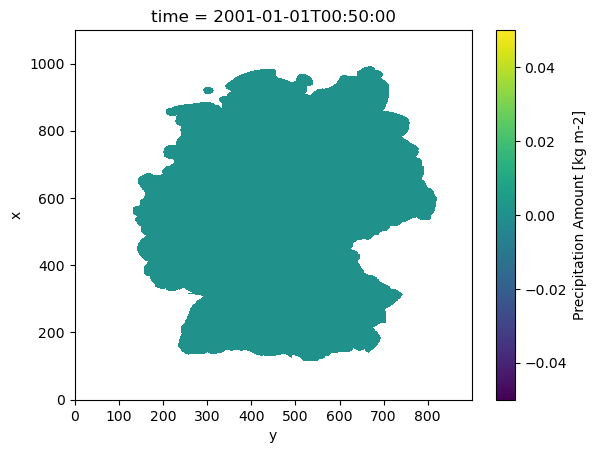

In [18]:
dataset_xarray['precip'].plot()

## 5. Checking if the netcdf-file conforms to the cf-Standard

To check whether the netCDF-file we created conforms to the CF-Standard, we use the so-called "CF-Checker": https://github.com/cedadev/cf-checker

It can be installed by using the package manager `Conda`:

```
conda create -n cfchecker -c conda-forge cfchecker # create new env OR
conda install cfchecker -c conda-forge             # install on existing env
```

Then, it can be executed the following way:

In [19]:
!cfchecks dataset_xarray_with_coordinates.nc

CHECKING NetCDF FILE: dataset_xarray_with_coordinates.nc
Using CF Checker Version 4.1.0
Checking against CF Version CF-1.8
Using Standard Name Table Version 82 (2023-07-06T13:17:07Z)
Using Area Type Table Version 11 (06 July 2023)
Using Standardized Region Name Table Version 4 (18 December 2018)


------------------
Checking variable: precip
------------------

------------------
Checking variable: lon_bnds
------------------
WARN: (7.1): Boundary Variable lon_bnds should not have _FillValue attribute

------------------
Checking variable: lat_bnds
------------------
WARN: (7.1): Boundary Variable lat_bnds should not have _FillValue attribute

------------------
Checking variable: lon
------------------

------------------
Checking variable: lat
------------------

------------------
Checking variable: time
------------------
WARN: (3): No standard_name or long_name attribute specified

ERRORS detected: 0
WARNINGS given: 3
INFORMATION messages: 0


## Further material

- https://unidata.github.io/python-training/workshop/CF%20Conventions/netcdf-and-cf-the-basics/
- CF-Conventions - Overview: https://cfconventions.org/
- CF-Conventions - current version: http://cfconventions.org/cf-conventions/cf-conventions.html